# Domácí úkol č. 2 - 🕸 Síťová analýza PID

## 📚 Data
Jako dataset nám poslouží [otevřená data Pražské integrované dopravy](https://pid.cz/o-systemu/opendata/). Konkrétně budeme pracovat s daty [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs), která jsou původně ve formátu GTFS (General Transit Feed Specification). To je formát, který využívá široká škála softwarových aplikací a kvůli tomu jej při publikaci dat využívají také veřejné dopravní agentury včetně PID.

☝️**Pozor!** Pro řešení domácí úlohy vám poskytneme už připravený dataset $D$ ve formátu `csv`. Dataset $D$ jsme pro vás sestavili z dat, která pocházejí z [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs). Více informací o všech souborech a jejich atributech lze nalézt v [dokumentaci formátu GTFS](https://developers.google.com/transit/gtfs/reference).

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 4 body. Úkol řešíte jako **jednotlivci**.

**✨ Dataset**
* Načtěte si data ze souboru `d.csv`, což je již zmíněný dataset $D$, který obsahuje záznam pro každé dvě **po sobě jdoucí** zastávky nějakého spoje.
* Struktura je následující (pro zjednodušení neuvažujeme service start_date a end_date):
| stop_from | stop_from_name | stop_to | stop_to_name | depart_from | arrive_to | route_type | is_night | mon | tue | wed | thu | fri | sat | sun |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| U699Z3P | Stadion Strahov | U981Z1P | Koleje Strahov | 7:24:00 | 7:25:00 | 3 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 0 |

* Jedinečným identifikátorem zastávky je **název zastávky**. Pozor na stejné názvy zastávek pro různé dopravní prostředky - u takových zastávek uvažujte, že se jedná o jednu a tutéž stanici.

**⚙️ Předzpracování dat**

* Atributy `depart_from` a `arrive_to` budete chtít nejspíše upravit. Obsahují totiž časové údaje delší než 24 hodin (celkem se jedná o 1.5 % záznamů). Z reference formátu GTFS (info o sloupci, z kterého vznikl `depart_from` a `arive_to`): _Arrival time at a specific stop for a specific trip on a route. … For times occurring after midnight on the service day, enter the time as a value greater than 24:00:00 in HH:MM:SS local time for the day on which the trip schedule begins._ Nicméně narazíte i na chybné časy, které začínají s hodnotou větší než 24. Všechny tyto případy můžete vyřešit pomocí **modulo 24** ☝️.


**🕸️ Základní síťová analýza** (celkem 12 bodů)

Úkolem je analyzovat síť zastávek PID. Zastávky tedy budou uzly sítě. Mezi dvěma zastávkami je orientovaná hrana, pokud jsou to dvě po sobě jdoucí zastávky nějakého spoje (existuje alespoň jeden záznam v datasetu $D$ s odpovídajícími `stop_from`, `stop_to`). Váha hrany je rovna počtu dopravních prostředků, které na dané trase za období jednoho týdne projedou.

Postupujte následovně:
* Začněte volbou libovolného balíčku pro analýzu a vizualizaci sítí (lze využít i zmíněný NetworkX),
* z datasetu $D$ vytvořte reprezentaci dat, která je vhodná pro vámi zvolený vizualizační balíček,
* vytvořte vizualizaci sítě (celkem za 4 body) - vizualizace musí být čitelná, proto můžete vizualizovat i podčást sítě (např. pro určitý dopravní prostředek, např. tramvaje (kromě vizualizace sítě lanovky nebo metra, tu neuznáváme) nebo nějaký podgraf - řešení ponecháme na vás),
* pomocí alespoň tří měr centrality analyzujte důležitost zastávek za období jednoho týdne (pondělí - neděle) a komentujte slovně, co tyto míry vzhledem ke konkrétním datům znamenají (každá míra za 2 body, celkem tedy za 6 bodů),
* vytvořte vizualizaci pro alespoň jednu míru centrality (celkem za 2 body).

**❓ Vlastní otázky** (3 body za každou otázku, celkem max. 9 bodů)

Vytvořte 3 otázky (můžete i více), založené na filtraci datasetu $D$ a odpovídejte na ně vhodnými vizualizacemi. Otázky pro inspiraci:
* Mění se důležité zastávky v závislosti na denním/nočním provozu?
* Je rozdíl ve vytíženosti zastávek během pracovního týdne/víkendu?
* ...

**🔥 Data navíc**

V souboru `stops.txt` je u každé zastávky uvedena **zeměpisná šířka a délka**. Tato data můžete využít pro rozšíření své analýzy a také vám mohou pomoci při layoutování grafu. ☝️ Pozor na stejné názvy zastávek s trochu jinou lokací pro různé dopravní prostředky. Je třeba navrhnout nějaké řešení (např. první, průměr, těžiště mnohoúhelníku apod., libovolně dle vašeho úsudku) a to zdůvodnit.

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 4 body za průběžné komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za vizualizaci sítě,
- 6 bodů za komentovanou analýzu alespoň 3 měr centrality,
- 2 body za vizualizaci jedné z měr centrality,
- 9 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 2 získat maximálně 25 bodů.

# Priprava prostredi, importy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Predzpracovani dat

Nejprve rychle koukneme na data, seznamime se s nimi a zkusime nalezt dulezite insighty

In [3]:
df_data = pd.read_csv('d.csv')
df_stops = pd.read_csv('stops.txt')

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642433 entries, 0 to 1642432
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   stop_from       1642433 non-null  object
 1   stop_from_name  1642433 non-null  object
 2   stop_to         1642433 non-null  object
 3   stop_to_name    1642433 non-null  object
 4   depart_from     1642433 non-null  object
 5   arrive_to       1642433 non-null  object
 6   route_type      1642433 non-null  int64 
 7   is_night        1642433 non-null  int64 
 8   monday          1642433 non-null  int64 
 9   tuesday         1642433 non-null  int64 
 10  wednesday       1642433 non-null  int64 
 11  thursday        1642433 non-null  int64 
 12  friday          1642433 non-null  int64 
 13  saturday        1642433 non-null  int64 
 14  sunday          1642433 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 188.0+ MB


In [5]:
df_data.isna().any()

stop_from         False
stop_from_name    False
stop_to           False
stop_to_name      False
depart_from       False
arrive_to         False
route_type        False
is_night          False
monday            False
tuesday           False
wednesday         False
thursday          False
friday            False
saturday          False
sunday            False
dtype: bool

Vidime, ze data mame kompletni - nikde nejsou chybejici hodnoty (resp. nejsou NaN hodnoty, zatim nevime jestli tam jsou schovane object type chybejici hodnoty)

In [6]:
df_data.sample(5)

,stop_from,stop_from_name,stop_to,stop_to_name,depart_from,arrive_to,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday
945054,U746Z2P,U Jankovky,U1042Z2P,Vrážská,6:42:00,6:43:00,3,0,1,1,1,1,1,0,0
959965,U448Z1P,Nádraží Běchovice,U28Z1P,Běchovice,12:31:00,12:34:00,3,0,0,0,0,0,0,1,1
640731,U699Z2P,Stadion Strahov,U176Z2P,Hybšmanka,17:16:00,17:17:00,3,0,1,1,1,1,1,0,0
584067,U453Z7P,Nádraží Hostivař,U677Z2P,Sklářská,18:47:00,18:48:00,3,0,1,1,1,1,1,0,0
880899,U403Z1P,Na Groši,U596Z1P,Obchodní centrum Hostivař,12:42:00,12:43:00,0,0,1,1,1,1,1,0,0


stop_from a stop_to - reprezentuji identifikatory stanic, a obsahuji i nektere informace navic:
- z jakeho pasma je tato stanice.
- jestli se jedna o normalni stanici, anebo prujezdni bod (ma prefix 'T' misto 'U').
- index stanice, kdyz ma stejny nazev (napriklad prestupni stanice metra, nebo kdyz ta stanice ma vice ruznych poloh atd.).
- a mozna i dalsi informace.

Zajimavejsi pro nas je route_type - totiz reprezentuje typ dopravy:

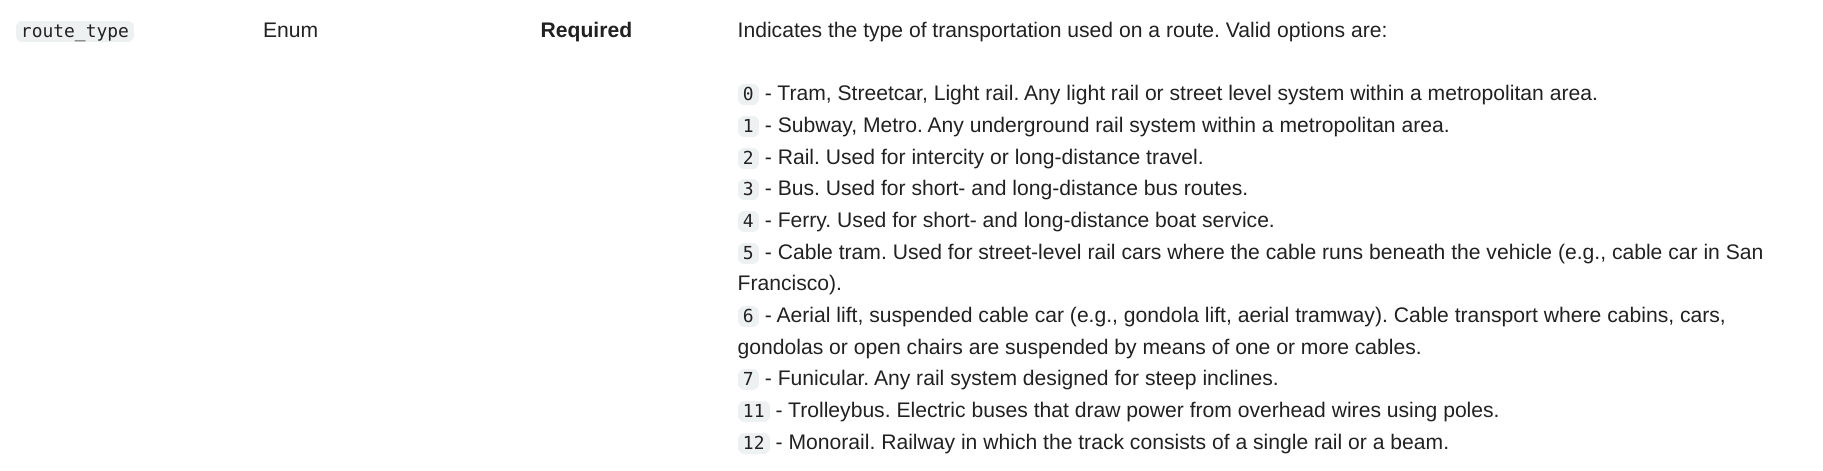

In [7]:
# jake typy dopravy jsou pritomne v nashich datech
df_data['route_type'].unique()

array([2, 3, 0, 4, 7, 1])

Hned vidie, ze mame:
- 2 - vlaky
- 3 - busy
- 0 - tramvaje
- 4 - lode
- 7 - lanovka
- 1 - metro

Dalsi vec - arrive_to a depart_from - reprezentuje cas kdy dopravni prostredek dorazil nebo odjel od stanici. Musime ale upravit data, protoze mame nektere zaznamy, kde cas je mnohem vetsi nez 24 hodin.

In [8]:
df_arrive_to_td = pd.to_timedelta(df_data["arrive_to"])
df_arrive_to_td.sort_values(inplace=True)
df_arrive_to_td.tail(10)

1069826   1 days 21:56:00
1069690   1 days 21:56:00
1069691   1 days 22:01:00
1069827   1 days 22:01:00
1069692   1 days 22:04:00
1069828   1 days 22:04:00
1069693   1 days 22:06:00
1069829   1 days 22:06:00
1069694   1 days 22:26:00
1069830   1 days 22:26:00
Name: arrive_to, dtype: timedelta64[ns]

Vidime, ze presah pres pulnoc u nekterych zaznamu je dokonce 22 hodiny! Tj. pred prevedenim do timedelta datoveho typu, nejvetsi zaznam mel hodnotu 46:26:00

Problem s takovymi zaznamy jednoduse vyresime tim, ze odstranime 1 den **pouze u tech zaznamu, kde hodnota je delsi nez 24 hodin**.

In [9]:
df_at_after_midnight = df_arrive_to_td[df_arrive_to_td >= pd.Timedelta("1 days")]
df_at_after_midnight.describe()

count                        39055
mean     1 days 02:06:52.139162719
std      0 days 01:48:53.043081933
min                1 days 00:00:00
25%                1 days 00:32:00
50%                1 days 01:49:00
75%                1 days 03:30:00
max                1 days 22:26:00
Name: arrive_to, dtype: object

Minimalni hodnota ma vice nez 24 dny a maximalni neprekrocuje 48 hodin - muzeme bez vetsich obav odecist od techto zaznamu jeden den.

In [10]:
df_at_am_fixed = df_at_after_midnight - pd.Timedelta("1 days")
df_at_am_fixed

328534    0 days 00:00:00
237078    0 days 00:00:00
615051    0 days 00:00:00
1218705   0 days 00:00:00
671643    0 days 00:00:00
                ...      
1069828   0 days 22:04:00
1069693   0 days 22:06:00
1069829   0 days 22:06:00
1069694   0 days 22:26:00
1069830   0 days 22:26:00
Name: arrive_to, Length: 39055, dtype: timedelta64[ns]

In [11]:
# aktualizujeme nase data
df_data.loc[df_at_am_fixed.index, 'arrive_to'] = df_at_am_fixed
# zbytek spravny dat prevedeme do timedelta
df_data['arrive_to'] = pd.to_timedelta(df_data["arrive_to"])
# a zobrazime vysledek
df_data["arrive_to"]

0         0 days 04:54:30
1         0 days 04:56:00
2         0 days 04:59:00
3         0 days 05:03:00
4         0 days 04:38:00
                ...      
1642428   0 days 17:46:00
1642429   0 days 17:47:00
1642430   0 days 17:49:00
1642431   0 days 17:50:00
1642432   0 days 17:52:00
Name: arrive_to, Length: 1642433, dtype: timedelta64[ns]

Uplne tu samou transformaci provedeme na depart_from sloupci:

In [12]:
df_depart_from_td = pd.to_timedelta(df_data["depart_from"])
df_depart_from_td.sort_values(inplace=True)
df_depart_from_td.tail(10) # zase maximum je > 24h and < 48h - odecteme jeden den

1069690   1 days 21:53:00
1069826   1 days 21:53:00
1069691   1 days 21:58:00
1069827   1 days 21:58:00
1069828   1 days 22:01:00
1069692   1 days 22:01:00
1069829   1 days 22:04:00
1069693   1 days 22:04:00
1069694   1 days 22:06:00
1069830   1 days 22:06:00
Name: depart_from, dtype: timedelta64[ns]

In [13]:
# druhe df jako depart_from, trochu matouci ale budme konzistentni
df_df_after_midnight = df_depart_from_td[df_depart_from_td >= pd.Timedelta("1 days")]
df_df_am_fixed = df_df_after_midnight - pd.Timedelta("1 days")
# aktualizujeme nase data
df_data.loc[df_df_am_fixed.index, "depart_from"] = df_df_am_fixed
# zbytek spravny dat prevedeme do timedelta
df_data["depart_from"] = pd.to_timedelta(df_data["depart_from"])
# a zobrazime vysledek
df_data["depart_from"]

0         0 days 04:53:00
1         0 days 04:54:30
2         0 days 04:56:00
3         0 days 04:59:00
4         0 days 04:36:00
                ...      
1642428   0 days 17:45:00
1642429   0 days 17:46:00
1642430   0 days 17:47:00
1642431   0 days 17:49:00
1642432   0 days 17:50:00
Name: depart_from, Length: 1642433, dtype: timedelta64[ns]

In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642433 entries, 0 to 1642432
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype          
---  ------          --------------    -----          
 0   stop_from       1642433 non-null  object         
 1   stop_from_name  1642433 non-null  object         
 2   stop_to         1642433 non-null  object         
 3   stop_to_name    1642433 non-null  object         
 4   depart_from     1642433 non-null  timedelta64[ns]
 5   arrive_to       1642433 non-null  timedelta64[ns]
 6   route_type      1642433 non-null  int64          
 7   is_night        1642433 non-null  int64          
 8   monday          1642433 non-null  int64          
 9   tuesday         1642433 non-null  int64          
 10  wednesday       1642433 non-null  int64          
 11  thursday        1642433 non-null  int64          
 12  friday          1642433 non-null  int64          
 13  saturday        1642433 non-null  int64          
 14  su

Oba typy jsou v timedelta a se spravnym casem. Zatim to nechame jako timedelta. Jako datovy typ datetime osobne nevidim smysl to representovat, protoze nevime vubec jaky je rok, mesic, atd., tj. nemame zadny referenci bod, od ktereho pocitat datum.

Jinak ostatni datove typy jsou v poradku.

Ted koukneme na dalsi dataset, ktery taky hodne vyuzijeme:

In [15]:
df_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16435 entries, 0 to 16434
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stop_id              16435 non-null  object 
 1   stop_name            15936 non-null  object 
 2   stop_lat             16435 non-null  float64
 3   stop_lon             16435 non-null  float64
 4   zone_id              15408 non-null  object 
 5   stop_url             0 non-null      float64
 6   location_type        16435 non-null  int64  
 7   parent_station       954 non-null    object 
 8   wheelchair_boarding  16435 non-null  int64  
 9   level_id             954 non-null    object 
 10  platform_code        14750 non-null  object 
 11  asw_node_id          15748 non-null  float64
 12  asw_stop_id          15354 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 1.6+ MB


In [16]:
df_stops.isna().any()

stop_id                False
stop_name               True
stop_lat               False
stop_lon               False
zone_id                 True
stop_url                True
location_type          False
parent_station          True
wheelchair_boarding    False
level_id                True
platform_code           True
asw_node_id             True
asw_stop_id             True
dtype: bool

Hned vidime, ze tento dataset uz ma dost chybejici hodnot. Podivame se bliz na data, ktera tam jsou obsazena:

In [17]:
df_stops.sample(5)

,stop_id,stop_name,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,wheelchair_boarding,level_id,platform_code,asw_node_id,asw_stop_id
16327,U332S1E5,"BUS Českolipská, Bulovka",50.126530,14.489530,NaN,NaN,2,U332S1,1,U332L0,NaN,332.0,NaN
16113,U476S1E1,E1,50.075470,14.437890,NaN,NaN,2,U476S1,2,U476L0,NaN,476.0,NaN
1498,U443Z1P,Nad Klamovkou,50.072716,14.376829,P,NaN,0,NaN,0,NaN,A,443.0,1.0
16369,U474N5,NaN,50.110287,14.501851,NaN,NaN,3,U474S1,0,U474L1,NaN,NaN,NaN
12207,U7993Z2,Svaté Pole,49.747978,14.169720,6,NaN,0,NaN,2,NaN,B,7993.0,2.0


A obsazena tady jsou velice zajimava data! 

- nejprve - vidime tady prehled vsech zastavek vubec! (spoiler: to budou nase vrcholy v budoucm grafu)

- dale tady mame informace o poloze - stop_lon a stop_lat - pomoci toho budeme urcovat polohu nasich datovych bodu (stanic)

- zone_id - zony - tj. jestli se jedna o prazskou dopravu anebo pro dorpavu v okoli Prahy (primestska doprava) - neboli jeste jinak receno - tarifni pasma
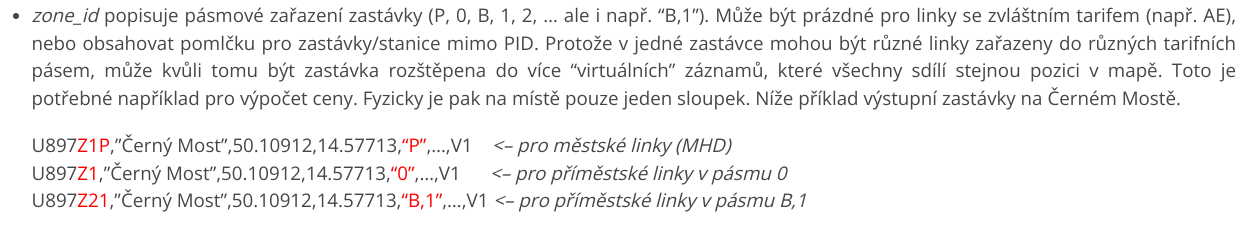

- dalsi zajimavy sloupec je location type:
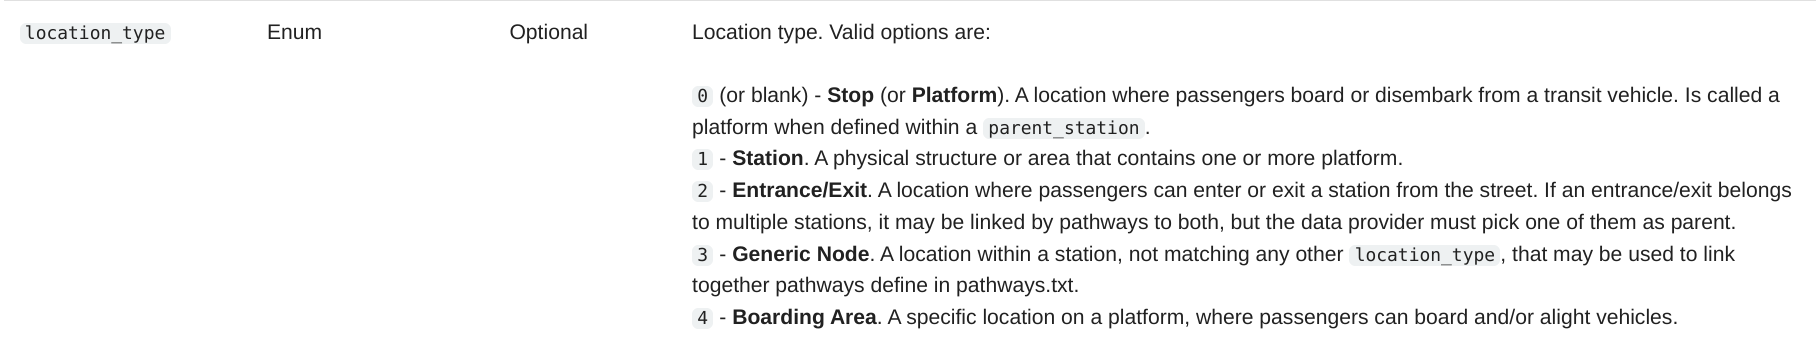
    Tento sloupec se muze vyuzit pokud budeme chtit odlisit stanice v situaci, kdy treba mame vice vchodu atd. 
- platform code:
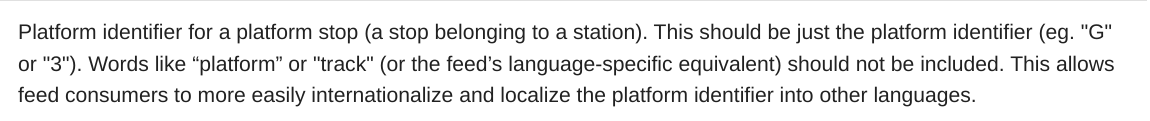
    Tento priznak muze by uzitecny tim, ze treba dokazeme odlisit linky metra.
- a dalsi zajimave udaje - jejich popis bude [tady](https://gtfs.org/schedule/reference/#stopstxt), pro nas asi budou bohate stacit jmenovane vyse sloupce

**Hned na zacatku omezime se na urcitou podmnozinu problemu:**

Dat je hodne, pocitat vsechno je dlouho, a pocitac neni nejrychlejsi, takze **BUNO budeme uvazovat pouze tarifni pasmo P**. Tj. zadne primestske linky a dalsi doplnek ciste prazske dopravy neuvazujeme. Proto hned na zacatku data vyfiltrujeme podle tohoto - pricemz vyfiltrujeme oba datasety:

In [18]:
df_stops_within_P = df_stops[df_stops['zone_id'].str.contains('P', na=False)]
df_stops_within_P

,stop_id,stop_name,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,wheelchair_boarding,level_id,platform_code,asw_node_id,asw_stop_id
0,U50S1,Budějovická,50.044411,14.448787,P,NaN,1,NaN,1,NaN,NaN,50.0,NaN
1,U52S1,Chodov,50.031672,14.490961,P,NaN,1,NaN,1,NaN,NaN,52.0,NaN
2,U75S1,Kolbenova,50.110395,14.516398,P,NaN,1,NaN,1,NaN,NaN,75.0,NaN
3,U78S1,Ládví,50.126591,14.469451,P,NaN,1,NaN,1,NaN,NaN,78.0,NaN
4,U100S1,Vltavská,50.100298,14.438492,P,NaN,1,NaN,1,NaN,NaN,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14815,U142Z301,Praha hl.n.,50.083096,14.436193,P,NaN,0,NaN,0,NaN,NaN,142.0,301.0
14819,U228Z301,Praha-Kačerov,50.041718,14.461809,P,NaN,0,NaN,0,NaN,NaN,228.0,301.0
14833,U463Z301,Praha-Vršovice,50.064518,14.447669,P,NaN,0,NaN,0,NaN,NaN,463.0,301.0
14836,U480Z301,Praha Masarykovo nádr.,50.087936,14.433739,P,NaN,0,NaN,0,NaN,NaN,480.0,301.0


Mimochodem, bylo 16 tisic zaznamu, ted mame 3427 zaznamu.

Ted ale musime vyfiltrovat vsechny nase budouci hrany:

In [19]:
# vezmeme vsechny stanice v Praze
df_stop_names_in_P = df_stops_within_P["stop_name"]
# stop_from_name a stop_to_name nesmi obsahovat nepovolenou stanici
# tj musi platit, ze vrcholy kazde hrany jsou v pasmu P
df_data_in_P = df_data[
    df_data["stop_from_name"].isin(df_stop_names_in_P)
    & df_data["stop_to_name"].isin(df_stop_names_in_P)
]
df_data_in_P

,stop_from,stop_from_name,stop_to,stop_to_name,depart_from,arrive_to,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday
128,U628Z4P,Terminál 1,U629Z2P,Terminál 2,0 days 14:10:00,0 days 14:11:00,3,0,0,0,0,0,0,1,1
129,U629Z2P,Terminál 2,U1090Z3P,Schengenská,0 days 14:11:00,0 days 14:12:00,3,0,0,0,0,0,0,1,1
130,U1090Z3P,Schengenská,U776Z2P,U Hangáru,0 days 14:12:00,0 days 14:14:00,3,0,0,0,0,0,0,1,1
131,U776Z2P,U Hangáru,U698Z2P,Terminál 3,0 days 14:14:00,0 days 14:17:00,3,0,0,0,0,0,0,1,1
132,U698Z2P,Terminál 3,U218Z2P,K Letišti,0 days 14:17:00,0 days 14:18:00,3,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642428,U394Z2P,Motol,U395Z2P,Krematorium Motol,0 days 17:45:00,0 days 17:46:00,0,0,1,1,1,1,1,0,0
1642429,U395Z2P,Krematorium Motol,U113Z2P,Hlušičkova,0 days 17:46:00,0 days 17:47:00,0,0,1,1,1,1,1,0,0
1642430,U113Z2P,Hlušičkova,U236Z2P,Slánská,0 days 17:47:00,0 days 17:49:00,0,0,1,1,1,1,1,0,0
1642431,U236Z2P,Slánská,U47Z2P,Blatiny,0 days 17:49:00,0 days 17:50:00,0,0,1,1,1,1,1,0,0


**Dalsi vec na kterou se omezime - nektere stanice maji duplicitni radky protoze maji vice nastupist, vchodu, prestupu atd - zatim tyto duplicity odstranime, nechame v podstate prvni vyskyty**

In [20]:
# napriklad
df_stops_within_P[df_stops_within_P['stop_name'] == 'Můstek']

,stop_id,stop_name,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,wheelchair_boarding,level_id,platform_code,asw_node_id,asw_stop_id
54,U1072S1,Můstek,50.083471,14.423972,P,NaN,1,NaN,1,NaN,NaN,1072.0,NaN
3444,U1072Z101P,Můstek,50.083480,14.424460,P,NaN,0,U1072S1,1,U1072L2,A1,1072.0,101.0
3445,U1072Z102P,Můstek,50.083590,14.424600,P,NaN,0,U1072S1,1,U1072L2,A2,1072.0,102.0
3446,U1072Z121P,Můstek,50.083450,14.423270,P,NaN,0,U1072S1,1,U1072L4,B1,1072.0,121.0
3447,U1072Z122P,Můstek,50.083320,14.423420,P,NaN,0,U1072S1,1,U1072L4,B2,1072.0,122.0


Samozrejme muzeme tyto duplicity vyresit chytrejsi zpusobem jak to bylo uvedeno v zadani, pomoci teziste mnohouhelniku, nebo jinym sofistikovanym zpusobem, my ale zatim pro jednoduchost se omezime na prvni v poradi zaznam, ostatni vyhodime.

In [21]:
df_stops_in_P = df_stops_within_P.drop_duplicates(subset='stop_name')
df_stops_in_P

,stop_id,stop_name,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,wheelchair_boarding,level_id,platform_code,asw_node_id,asw_stop_id
0,U50S1,Budějovická,50.044411,14.448787,P,NaN,1,NaN,1,NaN,NaN,50.0,NaN
1,U52S1,Chodov,50.031672,14.490961,P,NaN,1,NaN,1,NaN,NaN,52.0,NaN
2,U75S1,Kolbenova,50.110395,14.516398,P,NaN,1,NaN,1,NaN,NaN,75.0,NaN
3,U78S1,Ládví,50.126591,14.469451,P,NaN,1,NaN,1,NaN,NaN,78.0,NaN
4,U100S1,Vltavská,50.100298,14.438492,P,NaN,1,NaN,1,NaN,NaN,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14815,U142Z301,Praha hl.n.,50.083096,14.436193,P,NaN,0,NaN,0,NaN,NaN,142.0,301.0
14819,U228Z301,Praha-Kačerov,50.041718,14.461809,P,NaN,0,NaN,0,NaN,NaN,228.0,301.0
14833,U463Z301,Praha-Vršovice,50.064518,14.447669,P,NaN,0,NaN,0,NaN,NaN,463.0,301.0
14836,U480Z301,Praha Masarykovo nádr.,50.087936,14.433739,P,NaN,0,NaN,0,NaN,NaN,480.0,301.0


A mame 1368 unikatnich stanic!

Super, data mame pripravena. Ted muzeme zacit s pripravou grafu, ktery potom budeme ruzne vizualizovat a analyzovat!

# Zakladni sitova analyza

## 1. Priprava grafu

**Pro uplnou jednoduchost zatim budeme uvazovat neorientovany graf a nebudeme zatim vyuzivat depart_from a arrive_to, ktere nam poskytuji informaci i intenzite dopravy pres nejake stanice.**

Pokud zbyde cas, rad zkusim udelat analyzu na grafu s multihranami nebo intezitu vyjadrim jako informaci na vrcholech.

Zkusime vsechno provest takovym zpusobem, ze nejprve si pripravime graf, ktery bude obsahovat vsechny potrebne informace pro vizualizaci a analyzu, takze ani nemusime pozdeji sahat po datasetech (budouci ja potom posoudi, zda tento zpusob byl dobry nebo ne).

In [22]:
G = nx.Graph()

In [23]:
G.add_nodes_from(df_stops_in_P['stop_name'])
display(list(G.nodes)[:6])
display(len(G.nodes))

['Budějovická', 'Chodov', 'Kolbenova', 'Ládví', 'Vltavská', 'Opatov']

1368

Hura, stale mame 1368 unikatnich hodnot (vrcholu) jako i v datasetu, svet je v poradku.

Ted musime obohatit nas graf o hrany a metadata. Cilem je rozlisovat vrcholy dle:
- typu dopravy
- u metra rozlisovat jaka linka to je (A, B, C)

Pozdeji jeste pridame vzdalenosti mezi vrcholy jako vahy k hranam.

Ale jeste pred tim, jelikoz uvazujeme zjednodusenou situaci v neorientovanem grafu bez multihran - zjednodusime si dataset - odstranime sloupce ktere zatim nevyuzijeme a zaroven odstanime duplicitni hrany dle jmen stanic a typu dopravy (abychom mohli potom pridat pro vrcholy informaci o doprave). 

In [24]:
df_data_in_P_reduced = df_data_in_P.drop(columns=['depart_from','arrive_to', 'stop_from', 'stop_to']).drop_duplicates(subset=['stop_to_name','stop_from_name', 'route_type'])
df_data_in_P_reduced

,stop_from_name,stop_to_name,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday
128,Terminál 1,Terminál 2,3,0,0,0,0,0,0,1,1
129,Terminál 2,Schengenská,3,0,0,0,0,0,0,1,1
130,Schengenská,U Hangáru,3,0,0,0,0,0,0,1,1
131,U Hangáru,Terminál 3,3,0,0,0,0,0,0,1,1
132,Terminál 3,K Letišti,3,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1571751,Budějovická,Kačerov,1,0,1,1,1,1,1,1,1
1571752,Kačerov,Roztyly,1,0,1,1,1,1,1,1,1
1571753,Roztyly,Chodov,1,0,1,1,1,1,1,1,1
1571754,Chodov,Opatov,1,0,1,1,1,1,1,1,1


A mame celkem krasnych unikatnich 3829 hran!

Ted si zacneme obohacovat nas graf hranami a metadatami. Jelikoz networkx umi si vyporadat kdyz mu sypeme duplicitni hrany, tak muzeme hned do naseho grafu pridat vsechny hrany vubec, a uz potom obohatit vsechno na metadata (pedant by jeste tady namitl, ze jsme zbytecne nejrpve pridavali vrcholy, protoze kdyz pridavame hrany, tak se i vrcholy sami o sobe doplni):

In [25]:
G.add_edges_from(
    zip(df_data_in_P_reduced["stop_from_name"], df_data_in_P_reduced["stop_to_name"])
)

Ted si zacneme pridavat metadata. Zacneme metrem:

In [26]:
df_subway = df_data_in_P_reduced[df_data_in_P_reduced['route_type'] == 1]
df_subway

,stop_from_name,stop_to_name,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday
1534591,Depo Hostivař,Skalka,1,0,1,1,1,1,1,0,0
1534592,Skalka,Strašnická,1,0,1,1,1,1,1,0,0
1534593,Strašnická,Želivského,1,0,1,1,1,1,1,0,0
1534594,Želivského,Flora,1,0,1,1,1,1,1,0,0
1534595,Flora,Jiřího z Poděbrad,1,0,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1571751,Budějovická,Kačerov,1,0,1,1,1,1,1,1,1
1571752,Kačerov,Roztyly,1,0,1,1,1,1,1,1,1
1571753,Roztyly,Chodov,1,0,1,1,1,1,1,1,1
1571754,Chodov,Opatov,1,0,1,1,1,1,1,1,1


Vypada v poradku. Ted obohatime nasi vrcholy o informaci, ze tyto stanici jsou napojeni na sit metra.

In [27]:
df_subway_melt =  df_subway[['stop_from_name','stop_to_name']].melt()
df_subway_melt.sample(5)

,variable,value
55,stop_from_name,Černý Most
179,stop_to_name,Florenc
60,stop_from_name,Českomoravská
80,stop_from_name,Chodov
13,stop_from_name,Bořislavka


In [28]:
subway_stops = df_subway_melt['value'].unique()
subway_stops

array(['Depo Hostivař', 'Skalka', 'Strašnická', 'Želivského', 'Flora',
       'Jiřího z Poděbrad', 'Náměstí Míru', 'Muzeum', 'Můstek',
       'Staroměstská', 'Malostranská', 'Hradčanská', 'Dejvická',
       'Bořislavka', 'Nádraží Veleslavín', 'Petřiny', 'Nemocnice Motol',
       'Zličín', 'Stodůlky', 'Luka', 'Lužiny', 'Hůrka', 'Nové Butovice',
       'Jinonice', 'Radlická', 'Smíchovské nádraží', 'Anděl',
       'Karlovo náměstí', 'Národní třída', 'Náměstí Republiky', 'Florenc',
       'Křižíkova', 'Invalidovna', 'Palmovka', 'Českomoravská',
       'Vysočanská', 'Kolbenova', 'Hloubětín', 'Rajská zahrada',
       'Černý Most', 'Háje', 'Opatov', 'Chodov', 'Roztyly', 'Kačerov',
       'Budějovická', 'Pankrác', 'Pražského povstání', 'Vyšehrad',
       'I. P. Pavlova', 'Hlavní nádraží', 'Vltavská',
       'Nádraží Holešovice', 'Kobylisy', 'Ládví', 'Střížkov', 'Prosek',
       'Letňany'], dtype=object)

In [29]:
# inicializujeme atribut zatim prazdny - bude to mnozina typu
for node in G.nodes:
    G.nodes[node]['types'] = set()

In [30]:
for subway_stop in subway_stops:
    G.nodes[subway_stop]['types'].add(1)

In [31]:
# kontrola
G.nodes['Můstek']

{'types': {1}}

Tu samou transformaci provedeme nad vsemi typy dopravy.. Asi to bude chtit nejakou funkci:

In [32]:
# dela v podstate to same jako manualne u metra (~ copy paste)
def add_route_type(df_edges: pd.DataFrame, route_type: int, graph: nx.Graph) -> None:
    df_route_type = df_edges[df_edges["route_type"] == route_type]
    df_route_type_melt = df_route_type[["stop_from_name", "stop_to_name"]].melt()
    route_type_stops = df_route_type_melt["value"].unique()
    for route_type_stop in route_type_stops:
        graph.nodes[route_type_stop]["types"].add(route_type)

In [33]:
for route_type in [2, 3, 0, 4, 7]:
    add_route_type(df_edges=df_data_in_P_reduced, route_type=route_type, graph=G)



In [34]:
G.nodes['Dejvická'] 

{'types': {0, 1, 3}}

Coz je spravne, vskutku mame tady na Dejvicke busy, tramvaje a metro. Svet je v poradku.

Posledni vec (ve skutecnosti predposledni) kterou jeste provedeme - chceme pro vrcholy metra jeste specifikovat o jakou linku se jedna, abychom pri vizualizaci mohli je odlisovat. Docela to pomuze hned se zorientovat a predstavit mesto ve zmeti hran.

Na zacatku jsem tvrdil, ze to udelame jednoduse podle platform_code, ktery odlisuje linky metra.
Protipriklad:

In [35]:
df_ss_with_pc = df_stops[~df_stops['platform_code'].isna() & df_stops['stop_name'].isin(subway_stops)]
df_ss_with_pc[df_ss_with_pc['platform_code'].str.contains('A')]['stop_name'].unique()

array(['Budějovická', 'Chodov', 'Kolbenova', 'Ládví', 'Vltavská',
       'Opatov', 'Nádraží Holešovice', 'Flora', 'Hloubětín',
       'Hlavní nádraží', 'Bořislavka', 'Hradčanská', 'I. P. Pavlova',
       'Jiřího z Poděbrad', 'Kačerov', 'Karlovo náměstí', 'Háje',
       'Nemocnice Motol', 'Dejvická', 'Střížkov', 'Malostranská',
       'Pankrác', 'Muzeum', 'Smíchovské nádraží', 'Nádraží Veleslavín',
       'Vysočanská', 'Náměstí Míru', 'Náměstí Republiky', 'Petřiny',
       'Českomoravská', 'Vyšehrad', 'Palmovka', 'Národní třída',
       'Pražského povstání', 'Roztyly', 'Nové Butovice', 'Prosek',
       'Invalidovna', 'Kobylisy', 'Jinonice', 'Florenc', 'Staroměstská',
       'Strašnická', 'Křižíkova', 'Rajská zahrada', 'Černý Most',
       'Želivského', 'Skalka', 'Radlická', 'Letňany', 'Luka', 'Anděl',
       'Depo Hostivař', 'Můstek', 'Stodůlky', 'Hůrka'], dtype=object)

Vidime, ze Cerny most a Dejvicka maji platform code A - tedy A nereprezentuje linku.. 

In [36]:
subway_stops

array(['Depo Hostivař', 'Skalka', 'Strašnická', 'Želivského', 'Flora',
       'Jiřího z Poděbrad', 'Náměstí Míru', 'Muzeum', 'Můstek',
       'Staroměstská', 'Malostranská', 'Hradčanská', 'Dejvická',
       'Bořislavka', 'Nádraží Veleslavín', 'Petřiny', 'Nemocnice Motol',
       'Zličín', 'Stodůlky', 'Luka', 'Lužiny', 'Hůrka', 'Nové Butovice',
       'Jinonice', 'Radlická', 'Smíchovské nádraží', 'Anděl',
       'Karlovo náměstí', 'Národní třída', 'Náměstí Republiky', 'Florenc',
       'Křižíkova', 'Invalidovna', 'Palmovka', 'Českomoravská',
       'Vysočanská', 'Kolbenova', 'Hloubětín', 'Rajská zahrada',
       'Černý Most', 'Háje', 'Opatov', 'Chodov', 'Roztyly', 'Kačerov',
       'Budějovická', 'Pankrác', 'Pražského povstání', 'Vyšehrad',
       'I. P. Pavlova', 'Hlavní nádraží', 'Vltavská',
       'Nádraží Holešovice', 'Kobylisy', 'Ládví', 'Střížkov', 'Prosek',
       'Letňany'], dtype=object)

Asi mame stesti, ale ten seznam stanic co mame je jiz serazen dle linek!! Tedy staci proste okopirovat prislusny kus pole! Pozor, nektere stanice maji vice typu linky.

In [37]:
green_subway_link_A = {'Depo Hostivař', 'Skalka', 'Strašnická', 'Želivského', 'Flora',
       'Jiřího z Poděbrad', 'Náměstí Míru', 'Muzeum', 'Můstek',
       'Staroměstská', 'Malostranská', 'Hradčanská', 'Dejvická',
       'Bořislavka', 'Nádraží Veleslavín', 'Petřiny', 'Nemocnice Motol'}
yellow_subway_link_B = {'Zličín', 'Stodůlky', 'Luka', 'Lužiny', 'Hůrka', 'Nové Butovice',
       'Jinonice', 'Radlická', 'Smíchovské nádraží', 'Anděl',
       'Karlovo náměstí', 'Národní třída', 'Náměstí Republiky', 'Florenc',
       'Křižíkova', 'Invalidovna', 'Palmovka', 'Českomoravská',
       'Vysočanská', 'Kolbenova', 'Hloubětín', 'Rajská zahrada',
       'Černý Most', 'Můstek'}
red_subway_link_C = {'Háje', 'Opatov', 'Chodov', 'Roztyly', 'Kačerov', 'Florenc',
       'Budějovická', 'Pankrác', 'Pražského povstání', 'Vyšehrad',
       'I. P. Pavlova', 'Hlavní nádraží', 'Vltavská',
       'Nádraží Holešovice', 'Kobylisy', 'Ládví', 'Střížkov', 'Prosek',
       'Letňany'}


In [38]:
for node, node_attr in G.nodes(data=True):
    if node in subway_stops:
        node_attr["link"] = set()

In [39]:
for node, node_attr in G.nodes(data=True):
    if node in green_subway_link_A:
        node_attr["link"].add("A")
    elif node in yellow_subway_link_B:
        node_attr["link"].add("B")
    elif node in red_subway_link_C:
        node_attr["link"].add("C")

Posledni cast kterou jeste dodelame - pozice. Vuyzijeme znalosti zemepisnych sirek a delek, abychom mohli vizualizovat nase data geograficky vicemene spravne.

In [40]:
df_stops_pos = df_stops_in_P.drop_duplicates(subset=["stop_name"])[
    ["stop_name", "stop_lat", "stop_lon"]
].set_index("stop_name", drop=True)
df_stops_pos

,stop_lat,stop_lon
stop_name,,
Budějovická,50.044411,14.448787
Chodov,50.031672,14.490961
Kolbenova,50.110395,14.516398
Ládví,50.126591,14.469451
Vltavská,50.100298,14.438492
...,...,...
Praha hl.n.,50.083096,14.436193
Praha-Kačerov,50.041718,14.461809
Praha-Vršovice,50.064518,14.447669


In [62]:
df_stops_pos["coords"] = list(zip(df_stops_pos["stop_lon"], df_stops_pos["stop_lat"]))
positions = df_stops_pos["coords"].to_dict()
list(positions.items())[:10]

[('Budějovická', (14.448787, 50.044411)),
 ('Chodov', (14.490961, 50.031672)),
 ('Kolbenova', (14.516398, 50.110395)),
 ('Ládví', (14.469451, 50.126591)),
 ('Vltavská', (14.438492, 50.100298)),
 ('Opatov', (14.509192, 50.027889)),
 ('Nádraží Holešovice', (14.440073, 50.108915)),
 ('Flora', (14.462592, 50.078278)),
 ('Hloubětín', (14.53639, 50.106688)),
 ('Hlavní nádraží', (14.434138, 50.083506))]

In [42]:
for node, node_attr in G.nodes(data=True):
    node_attr['pos'] = positions[node]

In [43]:
G.nodes['Můstek']

{'types': {1}, 'link': {'A'}, 'pos': (14.423972, 50.083471)}

Ted mame vsechna metadata pripravena. Muzeme udelat prvni vizualizaci nase site!

## 2. Vizualizace site

In [44]:
# pripravime nodelisty a edgelist pro kazdou linku metra

red_link_nodelist = red_subway_link_C
red_link_edgelist = [
    edge
    for edge in G.edges
    if edge[0] in red_link_nodelist and edge[1] in red_link_nodelist
]

yellow_link_nodelist = yellow_subway_link_B
yellow_link_edgelist = [
    edge
    for edge in G.edges
    if edge[0] in yellow_link_nodelist and edge[1] in yellow_link_nodelist
]


green_link_nodelist = green_subway_link_A
green_link_edgelist = [
    edge
    for edge in G.edges
    if edge[0] in green_link_nodelist and edge[1] in green_link_nodelist
]

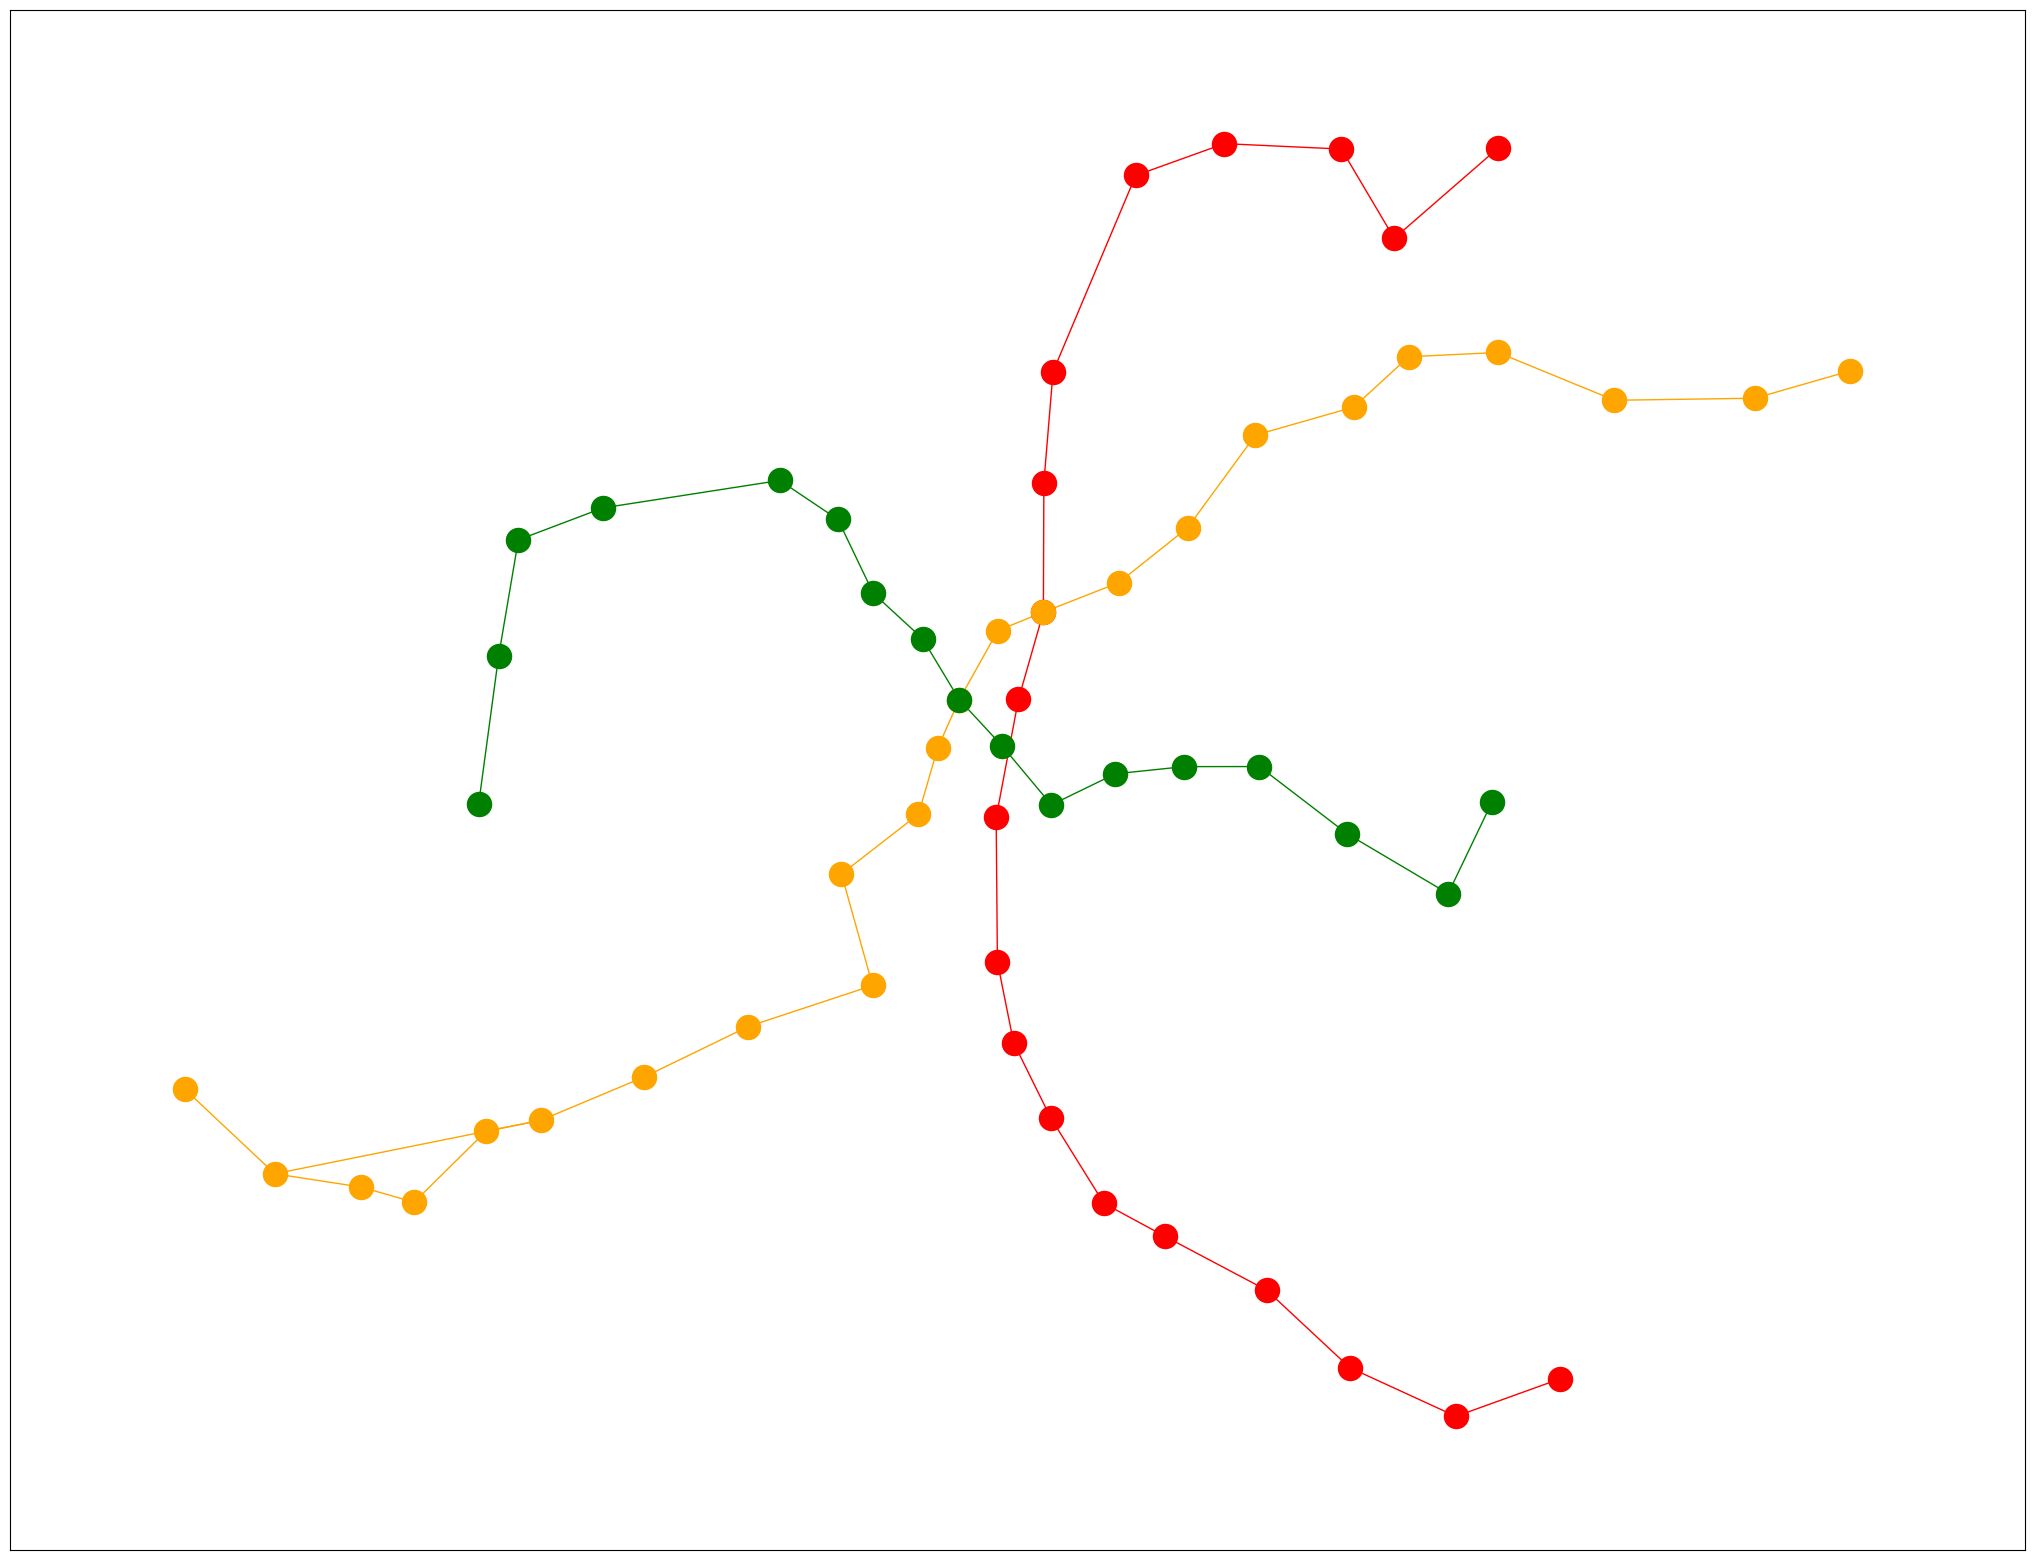

In [45]:
fig, ax = plt.subplots(figsize=(26,20))
nx.draw_networkx_nodes(G, positions, red_link_nodelist, node_color='red')
nx.draw_networkx_edges(G, positions, red_link_edgelist, edge_color='red')

nx.draw_networkx_nodes(G, positions, yellow_link_nodelist, node_color='orange')
nx.draw_networkx_edges(G, positions, yellow_link_edgelist, edge_color='orange')

nx.draw_networkx_nodes(G, positions, green_link_nodelist, node_color='green')
nx.draw_networkx_edges(G, positions, green_link_edgelist, edge_color='green')

Muzeme si vsimnout, ze z nejakeho duvodu se nam vytvoril dalsi spoj mezi Stodulky a Nove Butovice. 
Důvod tady je ten, že existuje hrana napřímo mezi těmito dvěma stanicemi kvůli jinému dopravnímu prostředku než metro. Ale my zatím hrany nerozlišujeme, pouze vrcholy. Pokud oba vrcholy jsou z metra - tak je i hrana metra. 

Abychom tento problém vyřešili, potřebovali bychom rozlišovat různé stanice se stejným jménem ale různým identifikátorem. Anebo bychom měli ukládat metadata v hranách - do jakého prostředku dopravy tato hrana patří.

Zatím to ale takto necháme, pokud zbyde čas, tak to upravime. 

In [46]:
def get_node_edge_lists(graph: nx.Graph, route_type: int) -> tuple:
    nodelist = [
        node
        for node, node_attr in graph.nodes(data=True)
        if route_type in node_attr["types"]
    ]
    edgelist = [edge for edge in G.edges if edge[0] in nodelist and edge[1] in nodelist]
    return (nodelist, edgelist)


def draw_edges_and_nodes(
    graph: nx.Graph,
    node_edge_lists: tuple,
    color,
    ax,
    node_size: int = 300,
    edge_width: float = 1,
    edge_label: str = None,
) -> None:
    pos = graph.nodes(data="pos")
    nx.draw_networkx_nodes(
        graph, pos, node_edge_lists[0], node_color=color, node_size=node_size, ax=ax
    )
    nx.draw_networkx_edges(
        graph,
        pos,
        node_edge_lists[1],
        edge_color=color,
        width=edge_width,
        ax=ax,
        label=edge_label,
    )

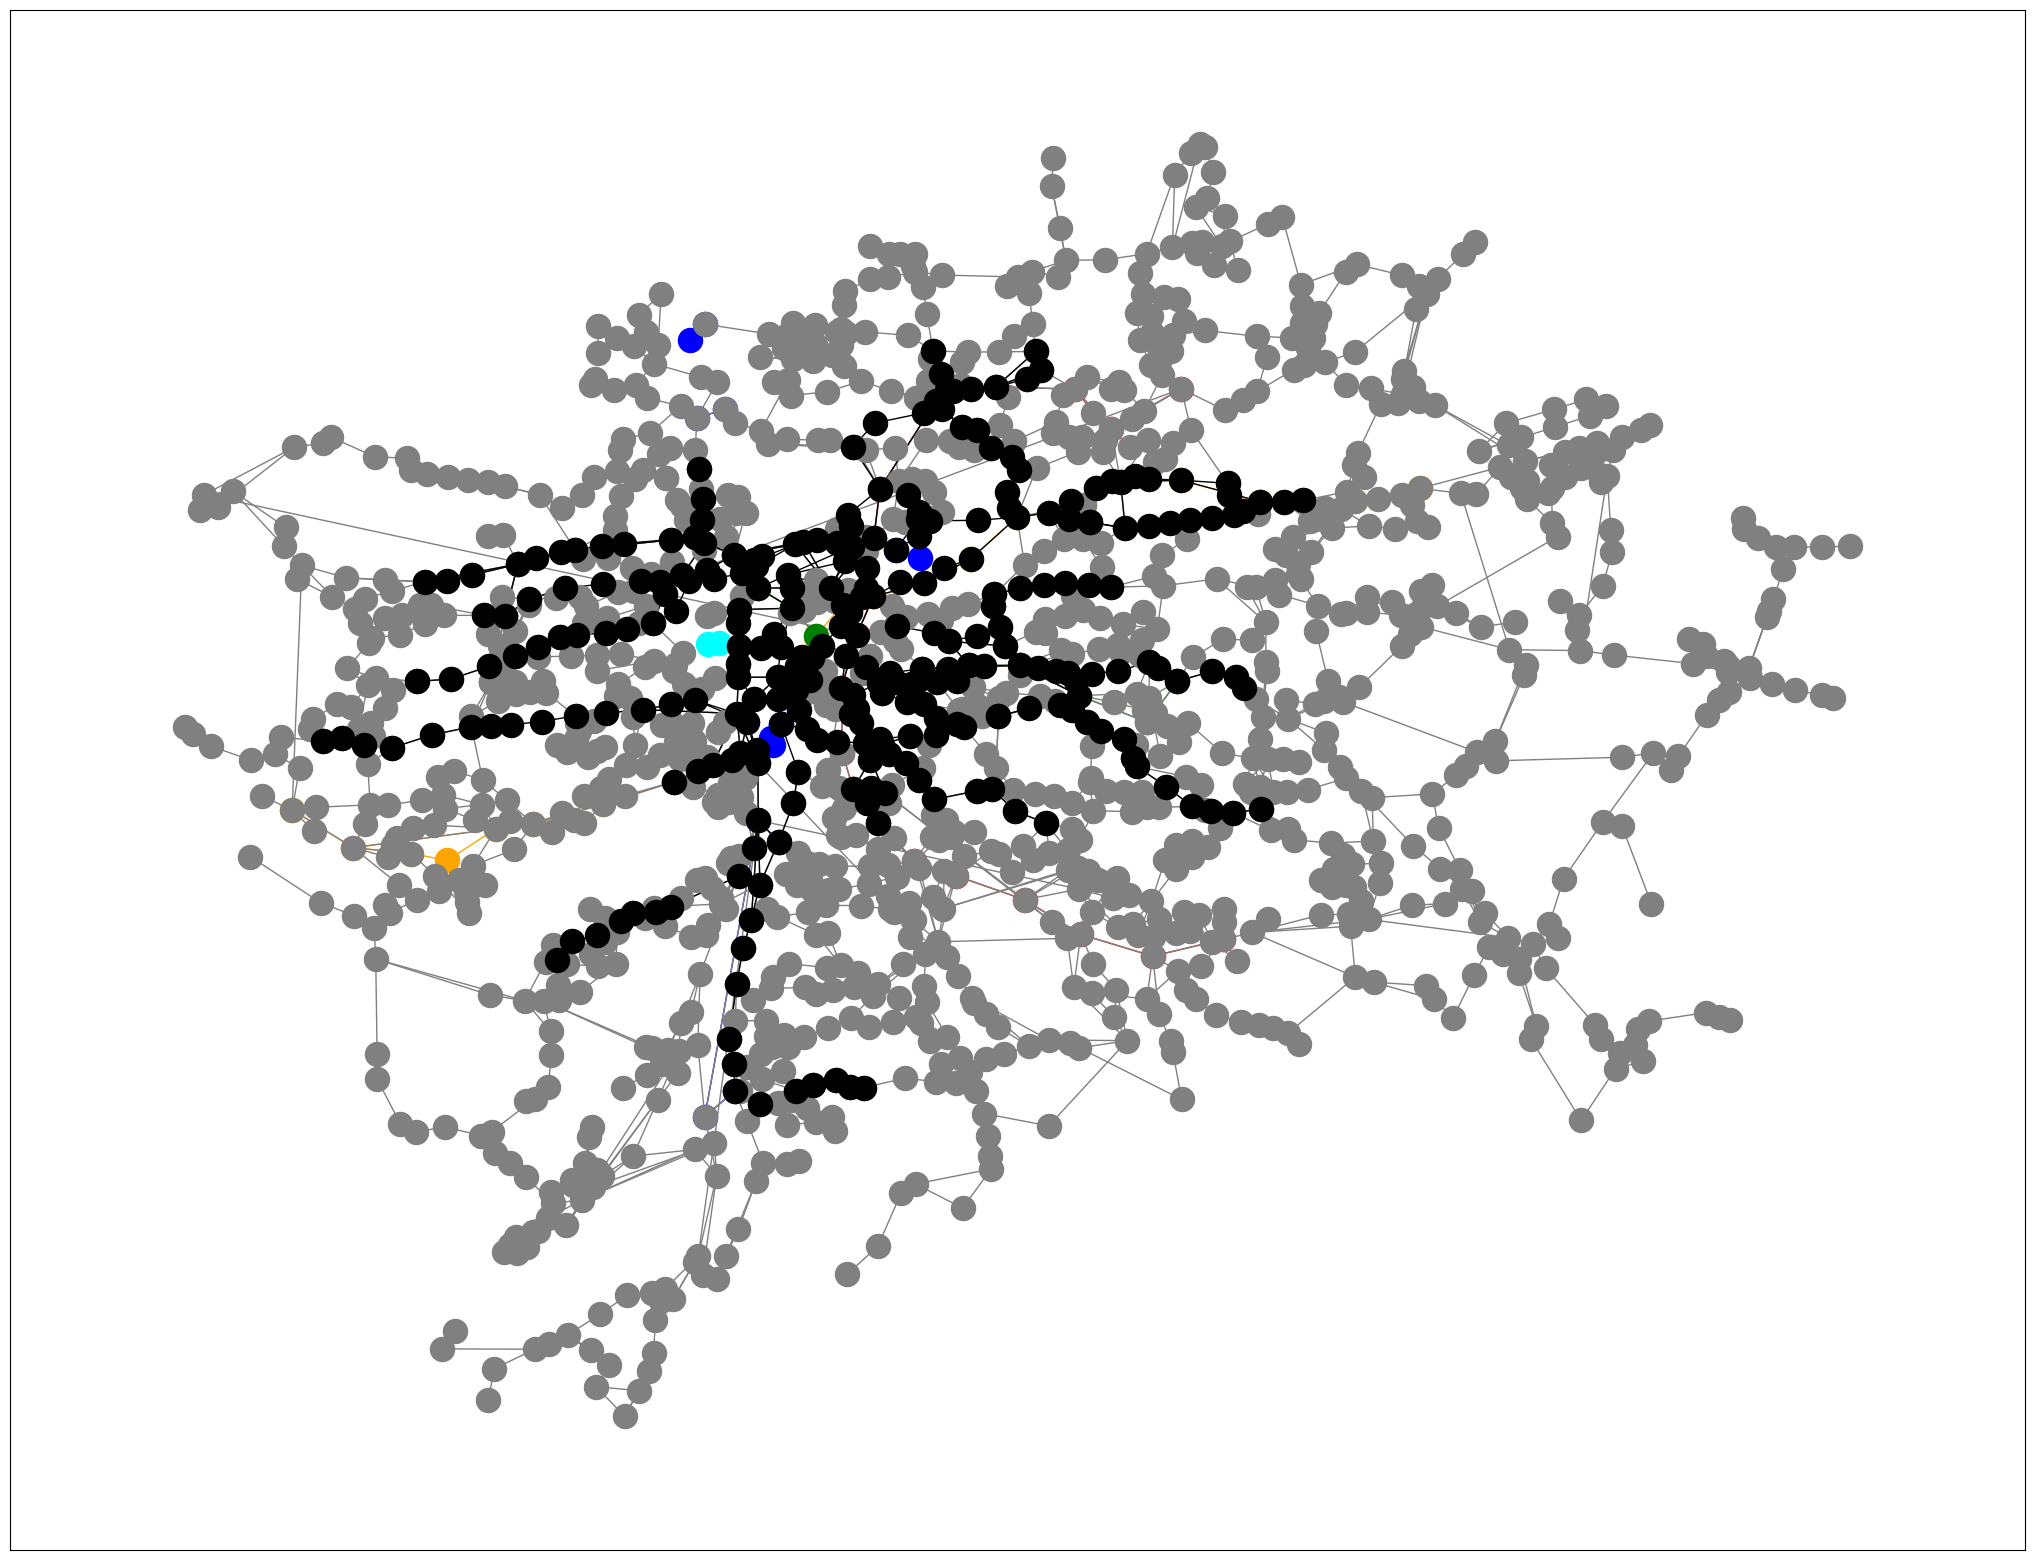

In [47]:
fig, ax = plt.subplots(figsize=(26,20))
nx.draw_networkx_nodes(G, positions, red_link_nodelist, node_color='red')
nx.draw_networkx_edges(G, positions, red_link_edgelist, edge_color='red')

nx.draw_networkx_nodes(G, positions, yellow_link_nodelist, node_color='orange')
nx.draw_networkx_edges(G, positions, yellow_link_edgelist, edge_color='orange')

nx.draw_networkx_nodes(G, positions, green_link_nodelist, node_color='green')
nx.draw_networkx_edges(G, positions, green_link_edgelist, edge_color='green')

draw_edges_and_nodes(G, get_node_edge_lists(G, 4), color='blue', ax=ax) # lode
draw_edges_and_nodes(G, get_node_edge_lists(G, 7), color='cyan', ax=ax) # lanovka
draw_edges_and_nodes(G, get_node_edge_lists(G, 3), color='grey', ax=ax) # busy
draw_edges_and_nodes(G, get_node_edge_lists(G, 0), color='black', ax=ax) # tramvaje


Vysledek neni moc prehledny, zkusime trochu si pohrat s vykreslovanim, aby bylo neco videt

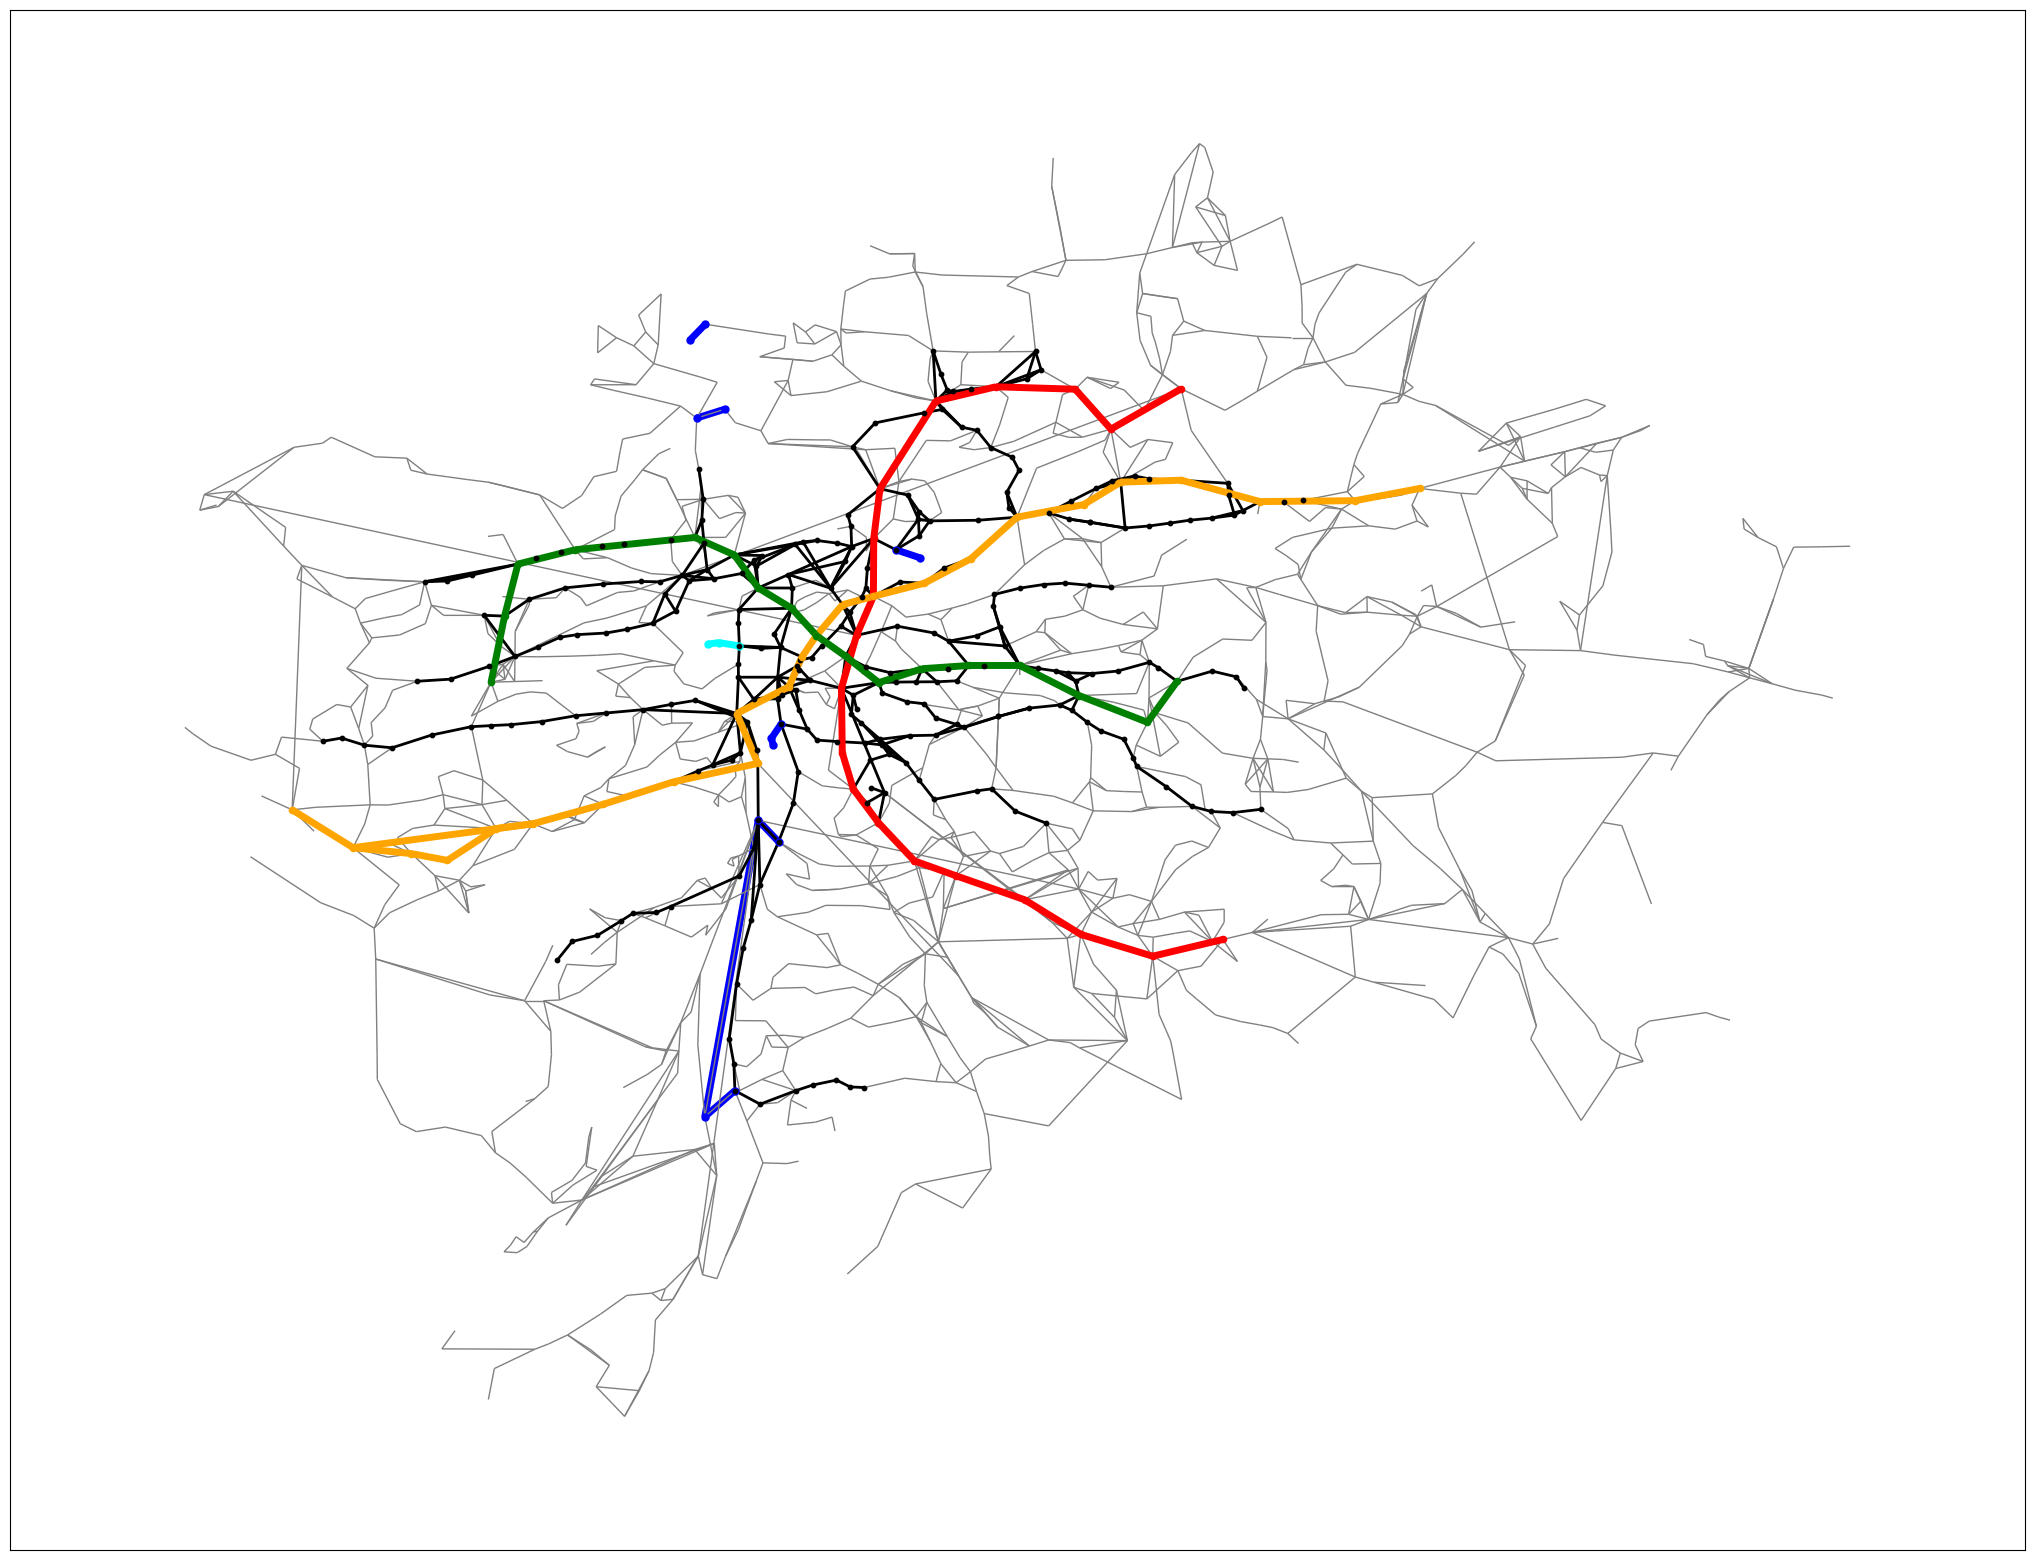

In [48]:
fig, ax = plt.subplots(figsize=(26, 20))


draw_edges_and_nodes(
    G, get_node_edge_lists(G, 4), color="blue", ax=ax, node_size=25, edge_width=5
)  # lode
draw_edges_and_nodes(
    G, get_node_edge_lists(G, 7), color="cyan", ax=ax, node_size=25, edge_width=5
)  # lanovka
draw_edges_and_nodes(
    G, get_node_edge_lists(G, 3), color="grey", node_size=0, ax=ax
)  # busy
draw_edges_and_nodes(
    G, get_node_edge_lists(G, 0), color="black", node_size=10, edge_width=2, ax=ax
)  # tramvaje

nx.draw_networkx_nodes(G, positions, red_link_nodelist, node_color="red", node_size=20)
nx.draw_networkx_edges(G, positions, red_link_edgelist, edge_color="red", width=5)

nx.draw_networkx_nodes(
    G, positions, yellow_link_nodelist, node_color="orange", node_size=20
)
nx.draw_networkx_edges(G, positions, yellow_link_edgelist, edge_color="orange", width=5)

nx.draw_networkx_nodes(
    G, positions, green_link_nodelist, node_color="green", node_size=20
)
nx.draw_networkx_edges(G, positions, green_link_edgelist, edge_color="green", width=5)

A tato vizualizace uz je docela dobra. Jenom jeste pridame legendu pro uplnost, a vizualizace je hotova

In [49]:
# zatim rucne odstranime spatnou hranou mezi Stodulky a Nove Butovice
if ("Nové Butovice", "Stodůlky") in yellow_link_edgelist:
    yellow_link_edgelist.remove(("Nové Butovice", "Stodůlky"))
yellow_link_edgelist

[('Kolbenova', 'Vysočanská'),
 ('Kolbenova', 'Hloubětín'),
 ('Hloubětín', 'Rajská zahrada'),
 ('Karlovo náměstí', 'Národní třída'),
 ('Karlovo náměstí', 'Anděl'),
 ('Lužiny', 'Luka'),
 ('Lužiny', 'Hůrka'),
 ('Smíchovské nádraží', 'Radlická'),
 ('Smíchovské nádraží', 'Anděl'),
 ('Vysočanská', 'Českomoravská'),
 ('Náměstí Republiky', 'Florenc'),
 ('Náměstí Republiky', 'Můstek'),
 ('Českomoravská', 'Palmovka'),
 ('Palmovka', 'Invalidovna'),
 ('Národní třída', 'Můstek'),
 ('Nové Butovice', 'Hůrka'),
 ('Nové Butovice', 'Jinonice'),
 ('Invalidovna', 'Křižíkova'),
 ('Jinonice', 'Radlická'),
 ('Florenc', 'Křižíkova'),
 ('Rajská zahrada', 'Černý Most'),
 ('Luka', 'Stodůlky'),
 ('Stodůlky', 'Zličín')]

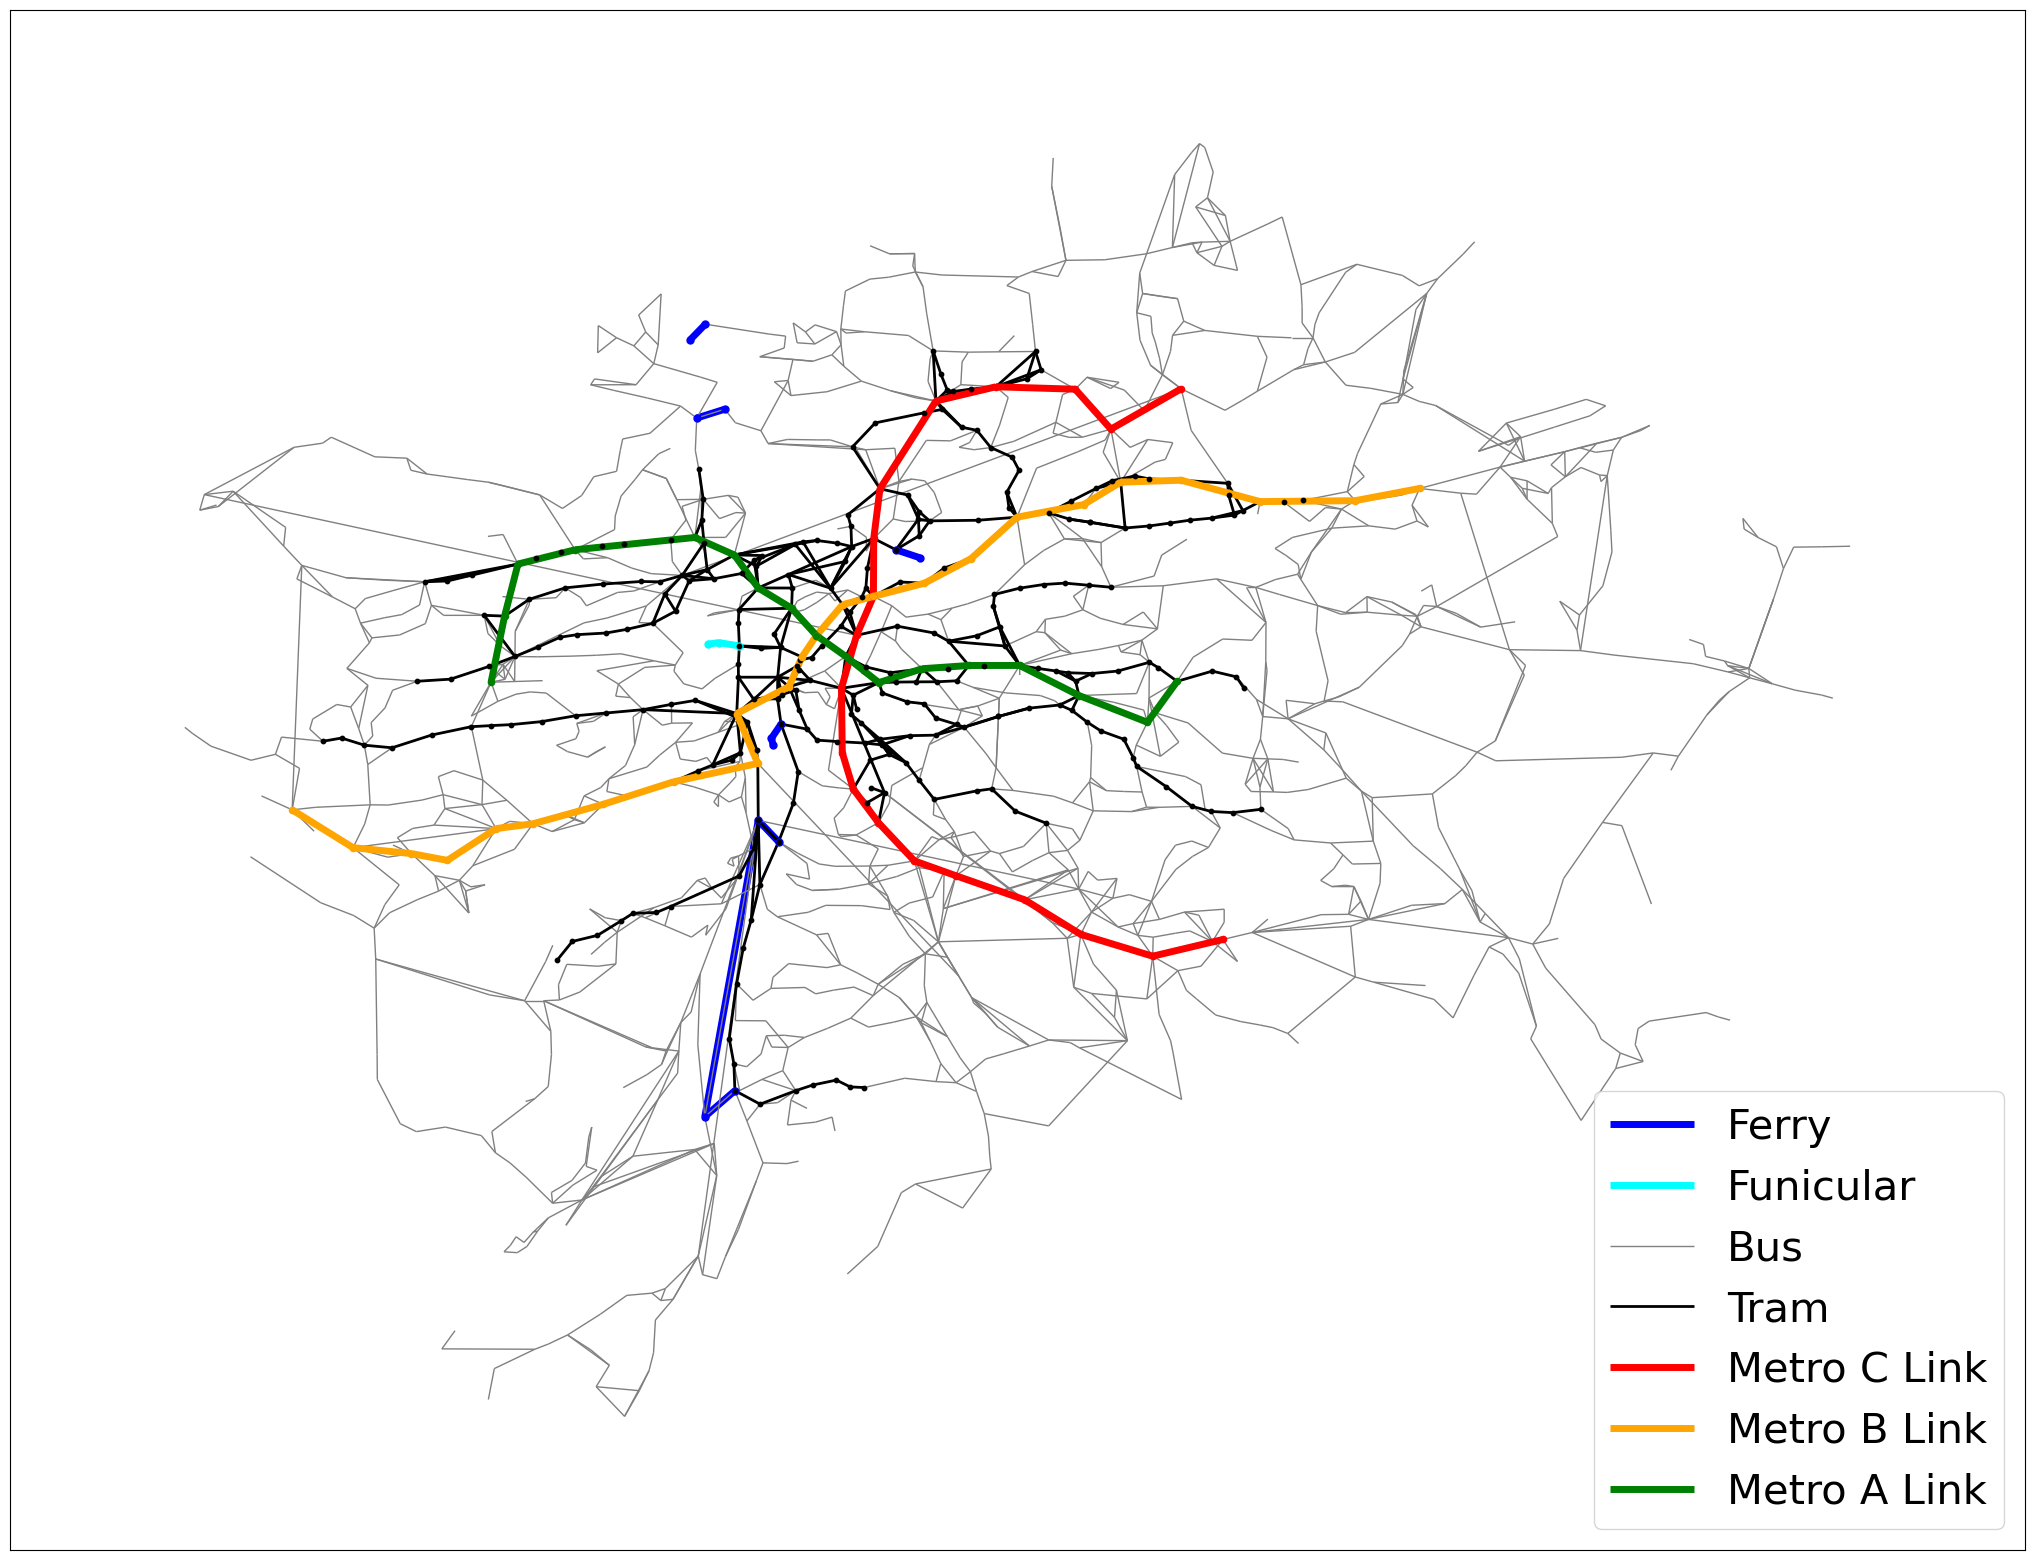

In [50]:
fig, ax = plt.subplots(figsize=(26, 20))

# lode
draw_edges_and_nodes(
    G,
    get_node_edge_lists(G, 4),
    color="blue",
    ax=ax,
    node_size=25,
    edge_width=5,
    edge_label="Ferry",
)

# lanovka
draw_edges_and_nodes(
    G,
    get_node_edge_lists(G, 7),
    color="cyan",
    ax=ax,
    node_size=25,
    edge_width=5,
    edge_label="Funicular",
)

# busy
draw_edges_and_nodes(
    G, get_node_edge_lists(G, 3), color="grey", node_size=0, ax=ax, edge_label="Bus"
)

# tramvaje
draw_edges_and_nodes(
    G,
    get_node_edge_lists(G, 0),
    color="black",
    node_size=10,
    edge_width=2,
    ax=ax,
    edge_label="Tram",
)

# Metro C
nx.draw_networkx_nodes(
    G,
    positions,
    red_link_nodelist,
    node_color="red",
    node_size=20,
    ax=ax,
)
nx.draw_networkx_edges(
    G,
    positions,
    red_link_edgelist,
    edge_color="red",
    width=5,
    label="Metro C Link",
    ax=ax,
)

# Metro B
nx.draw_networkx_nodes(
    G, positions, yellow_link_nodelist, node_color="orange", node_size=20, ax=ax
)
nx.draw_networkx_edges(
    G,
    positions,
    yellow_link_edgelist,
    edge_color="orange",
    width=5,
    ax=ax,
    label="Metro B Link",
)

# Metro A
nx.draw_networkx_nodes(
    G, positions, green_link_nodelist, node_color="green", node_size=20
)
nx.draw_networkx_edges(
    G,
    positions,
    green_link_edgelist,
    edge_color="green",
    width=5,
    ax=ax,
    label="Metro A Link",
)


# legenda
ax.legend(fontsize="30")

## 3. Analyza a vizualizace mer centrality

Nyni budeme analyzovat nas graf, konkretne miry centrality.

In [51]:
nx.is_connected(G)

False

Hned vidime, ze graf neni souvisly. To pro urcite miry centrality muze byt dost problematicke (centralita blizkosti, kde souvislost je predpokladem, jinak pro kazdy vrchol centralita blizkosti bude proste nulova, kvůli nekonečné délce neexistujici cesty mezi vrcholy v ruznych komponentach souvislosti)

To je problem, protoze centralitu blizkosti planujeme merit - pro jednoduchost zkusime urcit komponenty souvislosti, pak vybrat nejvetsi a s ni pracovat nadale.

In [52]:
connected_components = nx.connected_components(G)

for component in connected_components:
    print(len(component))

1362
1
1
2
1
1


Vidime, ze mame jednu velkou komponentu souvislosti a 4 malych (az podezrele malych).

Jak vubec muze vzniknout takova situace, ze mame v grafu zastavku, ktera vubec neni propojena s nicim.. Je to divny..

Odpoved muze byt, ze pri zpracovani jsme odstranovali duplicitni radky a neco nam mohlo vypadnout. Krome toho jsme orezavali tarifni pasma, takze tady taky by mohl byt prostor pro chyby. Nebo mozna samotna data nejsou dokonala a nekde neco chybi, nekde je nejaka nepresnost. Kazdopadne, resit to ted nebudeme, radeji pokracujeme dale.

In [53]:
connected_components = nx.connected_components(G)

skip_first: bool = True
for component in connected_components:
    if skip_first:
        skip_first = False
    else:
        print(component)

{'Praha-Bubny'}
{'Praha hl.n.'}
{'Praha-Krč', 'Praha-Kačerov'}
{'Praha-Vršovice'}
{'Praha Masarykovo nádr.'}


In [54]:
unconnected = {
    "Praha-Bubny",
    "Praha hl.n.",
    "Praha-Kačerov",
    "Praha-Krč",
    "Praha-Vršovice",
    "Praha Masarykovo nádr.",
}

In [55]:
for vertex in unconnected:
    print(G.nodes(data=True)[vertex])

{'types': set(), 'pos': (14.436193, 50.083096)}
{'types': set(), 'pos': (14.438851, 50.102303)}
{'types': set(), 'pos': (14.447669, 50.064518)}
{'types': {2}, 'pos': (14.445968, 50.03418)}
{'types': set(), 'pos': (14.433739, 50.087936)}
{'types': {2}, 'pos': (14.461809, 50.041718)}


Vypadli nam tedy dva vlakove vrcholy, a ostatni ani nemaji zadny typ. Tj. nenasla se pro ne zadna hrana, ktera by je obsahovala (typ jsem doplnovali tak, ze jsme brali hrany urciteho typu a pak vsechny vrcholy davali do jedne mnoziny, pres kterou iterovali graf a pridavali typ)

To ale nevadi, jednoduse se ted omezime na **podgraf**, ktery bude mit vsechny hrany krome techto 6 vrcholu.

In [56]:
C = G.subgraph(G.nodes - unconnected)

In [57]:
nx.is_connected(C)

True

Tak ted muzeme uplne v klidu pracovat s nasim grafem.

Zacneme se **stupnovou centralitou grafu**

### Stupnova Centralita Grafu

Pohodlne si vytahneme ucebni informaci z prednasky:
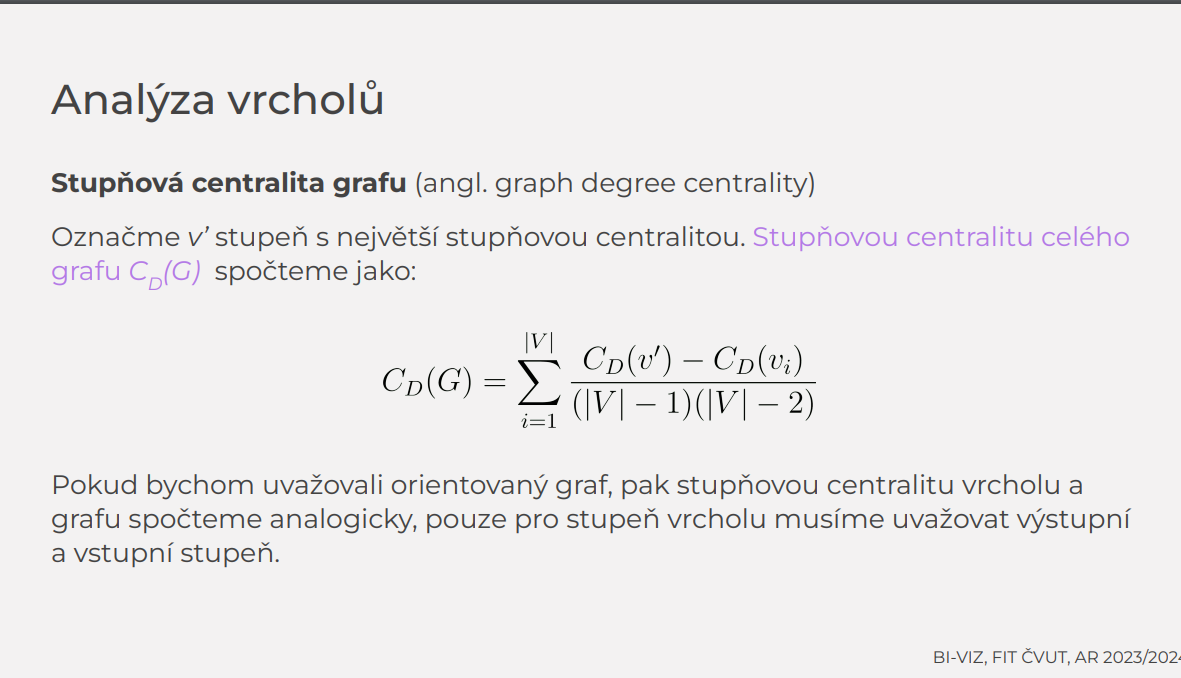

Z formule vyplyvaji zajimave vlastnosti. Vlastne nam rika, jak centralizovany ten graf je z hlediska stupni vrcholu v grafu.

 $C_D(v')$ - reprezentuje vrchol s nejvetsim stupnem (pro nas neorientovany graf nerozlisujeme vstupni a vystupni - tj. proste pocet vrcholu incidentnich s timto vrcholem). Cim je $C_D(v')$ vyssi, time mame vetsi stupnovou centralitu grafu.

 $C_D(v_i)$ - centralita kazdeho vrcholu. Cim nizsi bude cetnralita kazdeho vrcholu odlisneho od globalniho maxima $v'$, tim bude vetsi stupnova centralita grafu.

 Napriklad graf typu hvezda, kde jeden vrchol ma stupen $|V| - 1$ a ostatni stupen $1$, centralita bude maximalni. Naopak pokud kazdy vrchol ma stejny stupen, tak potom bude centralita grafu nulova - nikde neni zadny "popularni a hvezdny" vrchol

 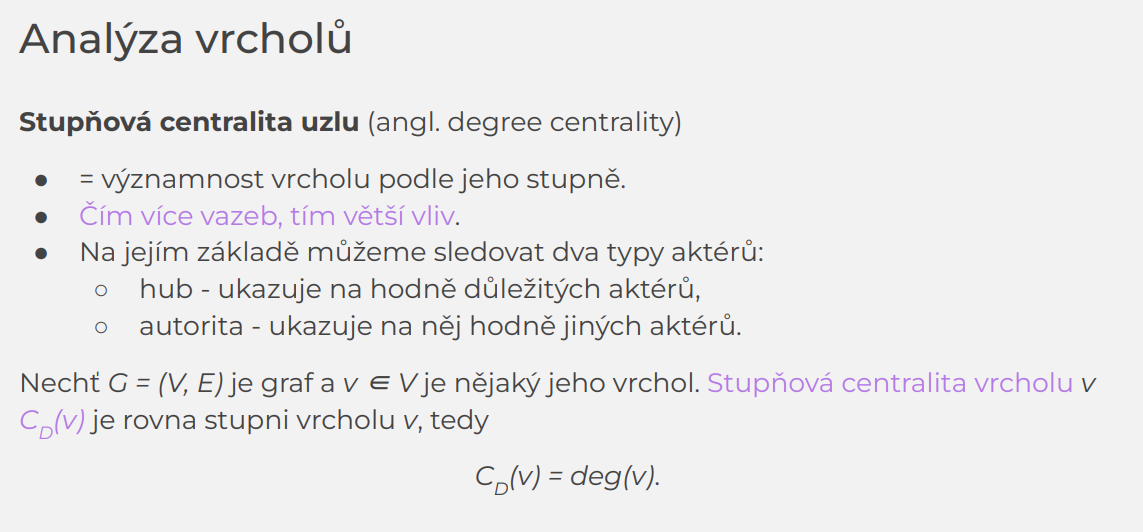

Ale staci teoritizovat, spocitejme centralitu grafu:

In [73]:
# spocitame stupne vrcholu
degrees = dict(C.degree())
max_degree = max(degrees, key=degrees.get)
print(max_degree)
print(degrees[max_degree])

Karlovo náměstí
13


Vidime za maximalni stupen ma Karlovo namesti a ma 13 sousednich stanic nebo zastavek.

In [83]:
deg_v_max = degrees[max_degree] # v'
V = len(C.nodes) # pocet vrcholu v grafu

In [84]:
graph_degree_centrality = 0
for deg_v_i in degrees.values():
    graph_degree_centrality += (deg_v_max - deg_v_i)/((V - 1)*(V - 2))
display(graph_degree_centrality)

0.0073594242987421715

$C_D(C) = 0.0073594242987421715$

$C_D(C) \approx 0.0074$

# Reference

1. [Otevrena data PID](https://pid.cz/o-systemu/opendata/#h-gtfs)
2. [GTFS specifikace](https://gtfs.org/schedule/reference/)